# *Modelos de ML*

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from pprint import pprint
from pprint import pprint
import matplotlib.pyplot as plt
import sklearn

In [3]:
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
items = pd.read_csv('https://raw.githubusercontent.com/Astroprogramm/PF-E-commerce-Olist/master/Datasets/olist_order_items_dataset.csv')
product = pd.read_csv('https://raw.githubusercontent.com/Astroprogramm/PF-E-commerce-Olist/master/Datasets/olist_products_dataset.csv')
Order_reviews_df = pd.read_csv('https://raw.githubusercontent.com/Astroprogramm/PF-E-commerce-Olist/master/Datasets/olist_order_reviews_dataset.csv')

In [5]:
product.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [6]:
items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [7]:
Order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [198]:
dataseeeeeet = pd.merge(items, product, on='product_id', sort=False)
dataseeeeeet

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [199]:
dataseeeeeet.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
dtype: int64

In [200]:
dataset= pd.merge(dataseeeeeet, Order_reviews_df, on='order_id', sort=False)

In [201]:
dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18


In [202]:
dataset.drop(['seller_id','shipping_limit_date','shipping_limit_date','freight_value', 'product_name_lenght',
              'product_description_lenght','product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm',
              'review_comment_title', 'review_creation_date', 'review_answer_timestamp','order_id', 'product_id', 'review_id','review_comment_message'], axis = 1, inplace = True )

In [203]:
dataset.head(1)

,order_item_id,price,product_category_name,product_photos_qty,review_score
0,1,58.9,cool_stuff,4.0,5


(array([14235.,     0.,  3874.,     0.,  9423.,     0., 21315., 63525.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

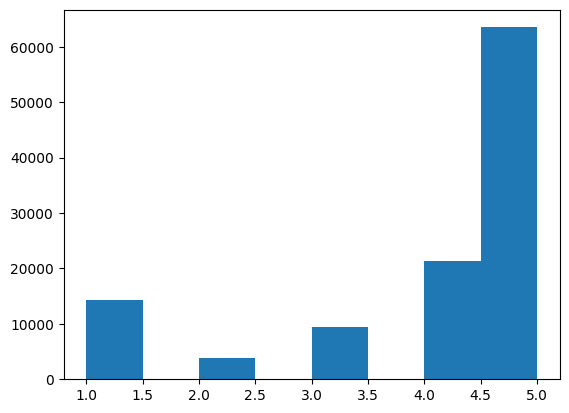

In [204]:
plt.hist(dataset['review_score'], bins=8)

In [205]:
dataset.groupby(['product_category_name'])['price'].count()

product_category_name
agro_industria_e_comercio     212
alimentos                     495
alimentos_bebidas             279
artes                         207
artes_e_artesanato             24
                             ... 
sinalizacao_e_seguranca       197
tablets_impressao_imagem       81
telefonia                    4517
telefonia_fixa                262
utilidades_domesticas        6943
Name: price, Length: 73, dtype: int64

In [240]:
df_matrix = pd.pivot_table(dataset, values='order_item_id', index='review_score', columns='product_category_name').fillna(0)
df_matrix.head(1000)

product_category_name,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
review_score,,,,,,,,,,,,,,,,,,,,,
1,1.592593,1.372549,1.941176,1.580645,1.000000,1.375,1.315789,1.050000,1.197183,1.246305,...,1.265625,1.00,1.333333,1.245007,1.0,1.350000,1.200000,1.348276,1.940000,1.659498
2,1.142857,1.461538,1.600000,1.000000,0.000000,1.000,1.000000,1.052632,1.150685,1.106796,...,1.322034,1.00,1.000000,1.175926,0.0,1.333333,1.166667,1.193370,2.117647,1.502008
3,1.000000,1.307692,1.310345,1.000000,1.333333,1.200,1.000000,1.057143,1.077640,1.069231,...,1.202797,1.00,1.000000,1.169173,0.0,1.862069,1.166667,1.245652,1.052632,1.303030
4,1.140351,1.108696,1.200000,1.051282,1.000000,1.000,1.135135,1.087719,1.093426,1.180680,...,1.180516,1.00,1.000000,1.093750,1.0,1.242424,1.000000,1.126283,1.267857,1.274648
5,1.259259,1.108626,1.275281,1.008929,1.066667,1.000,1.302632,1.036842,1.095338,1.076163,...,1.138796,1.02,1.000000,1.054338,0.0,1.598214,1.069767,1.060724,1.166667,1.219824


In [241]:
df_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(df_matrix)

In [242]:
dataset

,order_item_id,price,product_category_name,product_photos_qty,review_score
0,1,58.9,cool_stuff,4.0,5
1,1,55.9,cool_stuff,4.0,5
2,1,64.9,cool_stuff,4.0,4
3,1,58.9,cool_stuff,4.0,5
4,1,58.9,cool_stuff,4.0,5
...,...,...,...,...,...
112367,1,129.9,ferramentas_jardim,1.0,5
112368,1,99.0,moveis_decoracao,1.0,4
112369,1,736.0,relogios_presentes,3.0,5
112370,1,229.9,esporte_lazer,2.0,4


In [243]:
df_matrix

array([[1.        , 0.91618721, 0.95230372, 0.95986968, 0.97366028],
       [0.91618721, 1.        , 0.92050304, 0.92291428, 0.92167075],
       [0.95230372, 0.92050304, 1.        , 0.96040798, 0.96336167],
       [0.95986968, 0.92291428, 0.96040798, 1.        , 0.97626724],
       [0.97366028, 0.92167075, 0.96336167, 0.97626724, 1.        ]])

In [244]:
#pd.DataFrame(df_matrix,
             #columns = dataset.product_category_name,
             #index = dataset.review_score)

In [245]:
dataset

,order_item_id,price,product_category_name,product_photos_qty,review_score
0,1,58.9,cool_stuff,4.0,5
1,1,55.9,cool_stuff,4.0,5
2,1,64.9,cool_stuff,4.0,4
3,1,58.9,cool_stuff,4.0,5
4,1,58.9,cool_stuff,4.0,5
...,...,...,...,...,...
112367,1,129.9,ferramentas_jardim,1.0,5
112368,1,99.0,moveis_decoracao,1.0,4
112369,1,736.0,relogios_presentes,3.0,5
112370,1,229.9,esporte_lazer,2.0,4


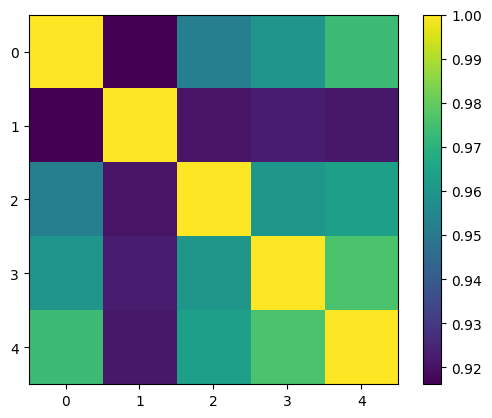

In [246]:
plt.imshow(df_matrix)
plt.colorbar()
plt.show()

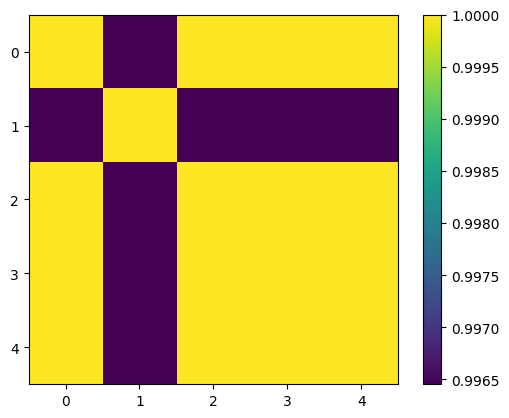

In [252]:
coseno_sim = cosine_similarity(df_matrix)
plt.imshow(coseno_sim)
plt.colorbar()
plt.show()

In [253]:
df_matrix = df_matrix.round(1)
df_matrix

array([[1. , 0.9, 1. , 1. , 1. ],
       [0.9, 1. , 0.9, 0.9, 0.9],
       [1. , 0.9, 1. , 1. , 1. ],
       [1. , 0.9, 1. , 1. , 1. ],
       [1. , 0.9, 1. , 1. , 1. ]])

In [254]:
def recommendation(title, coseno_sim = coseno_sim):
    idx = dataset.product_category_name
    sim_score = list(enumerate(coseno_sim[df_matrix.astype(int)]))
    sim_score = sorted(sim_score, key = lambda x: x[1].all(), reverse = True)
    sim_score = sim_score[2:5]
    producto_index = [i[0] for i in sim_score]
    return dataset['product_category_name'].iloc[producto_index]

In [255]:
titulo = str((dataset.iloc[5]['product_category_name'])) 
print("Tu selecionaste este prodcuto : " + titulo + "Y te recomendamos : ")
print(recommendation(titulo))

Tu selecionaste este prodcuto : cool_stuffY te recomendamos : 
2    cool_stuff
3    cool_stuff
4    cool_stuff
Name: product_category_name, dtype: object


In [251]:
average_prodc = pd.DataFrame(dataset.groupby('product_category_name')['price'].mean())
average_prodc['ProductCount'] = pd.DataFrame(dataset.groupby('product_category_name')['price'].count())
average_prodc.sort_values('ProductCount', ascending=False).head()

mi_repo_ratings = df_matrix[2]
similar_to_mine = df_matrix.product_category_name(mi_repo_ratings)
corr_mine = pd.DataFrame(similar_to_mine, columns=['pearsonR'])
corr_mine.dropna(inplace=True)
corr_summary = corr_mine.join(average_prodc['rating'])
corr_summary[corr_summary['rating']>=1].sort_values('pearsonR', ascending=False).head(10)

AttributeError: 'numpy.ndarray' object has no attribute 'product_category_name'

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

def normalize(pred_ratings):
    '''
    This function will normalize the input pred_ratings
    
    params:
        pred_ratings (List -> List) : The prediction ratings 
    '''
    return (pred_ratings - pred_ratings.min()) / (pred_ratings.max() - pred_ratings.min())
    
def generate_prediction_df(mat, pt_df, n_factors):
    '''
    This function will calculate the single value decomposition of the input matrix
    given n_factors. It will then generate and normalize the user rating predictions.
    
    params:
        mat (CSR Matrix) : scipy csr matrix corresponding to the pivot table (pt_df)
        pt_df (DataFrame) : pandas dataframe which is a pivot table
        n_factors (Integer) : Number of singular values and vectors to compute. 
                              Must be 1 <= n_factors < min(mat.shape). 
    '''
    
    if not 1 <= n_factors < min(mat.shape):
        raise ValueError("Must be 1 <= n_factors < min(mat.shape)")
        
    # matrix factorization
    u, s, v = svds(mat, k = n_factors)
    s = np.diag(s)

    # calculate pred ratings
    pred_ratings = np.dot(np.dot(u, s), v) 
    pred_ratings = normalize(pred_ratings)
    
    # convert to df
    pred_df = pd.DataFrame(
        pred_ratings,
        columns = pt_df.columns,
        index = list(pt_df.index)
    ).transpose()
    return pred_df

def recommend_items(pred_df, usr_id, n_recs):
    '''
    Given a usr_id and pred_df this function will recommend
    items to the user.
    
    params:
        pred_df (DataFrame) : generated from `generate_prediction_df` function
        usr_id (Integer) : The user you wish to get item recommendations for
        n_recs (Integer) : The number of recommendations you want for this user
    '''
    
    usr_pred = pred_df[usr_id].sort_values(ascending = False).reset_index().rename(columns = {usr_id : 'sim'})
    rec_df = usr_pred.sort_values(by = 'sim', ascending = False).head(n_recs)
    return rec_df

In [ ]:
# constants
# generate a pivot table with readers on the index and books on the column and values being the ratings
pt_df = dataset[]
'''dataset.pivot_table(
    columns = 'product_id',
    index = 'order_id',
    values = 'review_score').fillna(0)'''

# convert to a csr matrix
mat = pt_df.values
mat = csr_matrix(mat)

pred_df = generate_prediction_df(mat, pt_df, 10)

# generate recommendations
print(recommend_items(pred_df, 5, 5))

SyntaxError: invalid syntax (2877900264.py, line 3)